In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas import DataFrame
from scipy.stats import linregress

In [2]:
with open("sequences.json", 'r') as f:
    protein_sequence = json.load(f)

protein_sequence

['MSWDPNPVPRTLRCWRLRRASETALQSSRRAVEDQLKICGHRRDADVFELFLSKKELTEVIDLSRFKKLKYLWLHHNKLHGITFLTRNYCLTELYLNNNAIFEIEGLHYLPSLHILLLHHNELTNIDATVKELKGMLNLKILSLYQNPLCQYNLYRLYIIYHLPGVELLDRNQVTEKERRSMITIFNHKKAHIVQSIAFGGKVDASWDPKSPFKQKPAQRVPSDFAFANNVDKTVLDDPEDAVFVRSMKRSVMTLTSMNWDTVPTREERYLEEEGTETAQMLTVTLR',
 'MVFFTCNACGESVKKIQVEKHVSVCRNCECLSCIDCGKDFWGDDYKNHVKCISEDQKYGGKGYEGKTHKGDIKQQAWIQKISELIKRPNVSPKVRELLEQISAFDNVPRKKAKFQNWMKNSLKVHNESILDQVWNIFSEASNSEPVNKEQDQRPLHPVANPHAEISTKVPASKVKDAVEQQGEVKKNKRERKEERQKKRKREKKELKLENHQENSRNQKPKKRKKGQEADLEAGGEEVPEANGSAGKRSKKKKQRKDSASEEEAHVGAGKRKRRHSEVETDSKKKKMKLPEHPEGGEPEDDEAPAKGKFNWKGTIKAILKQAPDNEITIKKLRKKVLAQYYTVTDEHHRSEEELLVIFNKKISKNPTFKLLKDKVKLVK',
 'MRNIMYFGGTCQSPALPALVRPPAPPLQPSLDIKPFLPFPLDTAAAVNLFPNFNAMDPIQKAVINHTFGVPLPHRRKQIISCNICQLRFNSDSQAAAHYKGTKHAKKLKALEAMKNKQKSVTAKDSAKTTFTSITTNTINTSSDKTDGTAGTPAISTTTTVEIRKSSVMTTEITSKVEKSPTTATGNSSCPSTETEEEKAKRLLYCSLCKVAVNSASQLEAHNSGTKHKTMLEARNGSGTIKAFPRAGVKGKGPVNKGNTGLQNKTFHCEICDVHVNSETQLKQHISSRRHKDRAAGKPPKPKYSPYNKLQKTAHPLGVKLV

In [3]:
protein_length = []
met_count = []

In [4]:
for i in protein_sequence:
    count = 0
    for x in i:
        if x == 'M':
            count += 1
    met_count.append(count)
    protein_length.append(len(i))

In [5]:
d = {'ProteinLength': protein_length, 'NumberOfMethionines': met_count}

In [6]:
df = DataFrame(d)

In [7]:
m, b = np.polyfit(df.ProteinLength, df.NumberOfMethionines, 1)

In [13]:
x = list(df.ProteinLength)
x

[287,
 379,
 395,
 82,
 206,
 100,
 97,
 199,
 156,
 462,
 584,
 451,
 444,
 111,
 99,
 93,
 557,
 183,
 837,
 95,
 504,
 735,
 339,
 1342,
 588,
 455,
 539,
 560,
 228,
 112,
 409,
 159,
 151,
 363,
 740,
 236,
 115,
 599,
 294,
 3926,
 1142,
 436,
 638,
 534,
 259,
 397,
 848,
 1140,
 375,
 1596,
 410,
 1718,
 124,
 210,
 626,
 1388,
 1374,
 412,
 405,
 504,
 342,
 400,
 823,
 955,
 628,
 263,
 163,
 102,
 236,
 531,
 259,
 520,
 271,
 291,
 359,
 359,
 348,
 561,
 875,
 514,
 593,
 2012,
 341,
 290,
 115,
 669,
 555,
 622,
 231,
 420,
 454,
 899,
 693,
 339,
 74,
 258,
 154,
 681,
 786,
 323,
 330,
 156,
 526,
 1603,
 236,
 480,
 444,
 438,
 875,
 499,
 364,
 899,
 753,
 1322,
 734,
 431,
 2997,
 439,
 180,
 306,
 770,
 229,
 611,
 250,
 264,
 404,
 831,
 170,
 744,
 218,
 498,
 315,
 273,
 737,
 535,
 414,
 338,
 443,
 421,
 291,
 663,
 382,
 225,
 987,
 796,
 752,
 84,
 176,
 403,
 450,
 871,
 1150,
 364,
 383,
 445,
 204,
 465,
 441,
 444,
 950,
 304,
 661,
 1441,
 740,
 350,
 10

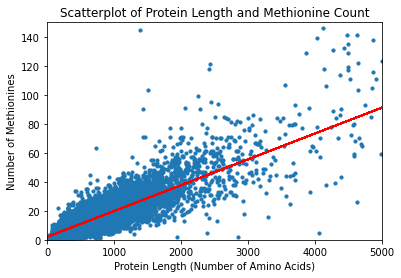

In [20]:
plt.scatter(df.ProteinLength, df.NumberOfMethionines, s=10)
plt.plot(df.ProteinLength, m*df.ProteinLength+b, color = "red")
plt.ylabel("Number of Methionines")
plt.xlabel("Protein Length (Number of Amino Acids)")
plt.axis([0,5000,0,150])
plt.title("Scatterplot of Protein Length and Methionine Count")
plt.savefig('scatterplot.png')
plt.show()

In [9]:
correlation_matrix = np.corrcoef(df.ProteinLength, df.NumberOfMethionines)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.735455633458146


In [15]:
X = df["ProteinLength"].values 
Y = df["NumberOfMethionines"].values

In [17]:
slope, intercept, r_value, p_value, std_err = linregress(X,Y)

In [18]:
slope

0.0178306281485188

In [19]:
intercept

2.0323310597565154

In [22]:
(5 - intercept)/slope

166.436589643647